In [177]:
from disambiguation.core import Database
from disambiguation import config
from cPickle import load
import pandas as pd
from glob import glob
%load_ext autoreload
import re
import json
%autoreload 2
import numpy as np
import igraph as ig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Export full tables, with additional identity column to file. 

In [141]:
idm = Database.IdentityManager('USA')
idm.fetch_dict_identity_2_id()


Table 'identities_v5' exists.
Table 'identities_adjacency_v5' exists.
Table 'linked_identities_v5' exists.


'identities_v5'

In [182]:
reachables = tuple(sorted(idm.get_reachable_identities('NY-95935')))
print reachables

# reachables = tuple(sorted(idm.get_reachable_identities('NY-466378')))
# print reachables

(u'CT-22864', u'CT-22867', u'CT-22870', u'NY-95813', 'NY-95935', u'NY-95941', u'NY-95974', u'NY-95978')


[1, 1, 1, 1, -100, 1, 1, 1, 1, 1]
[u'NY-95974', u'NY-95978', u'CT-22864', u'CT-22867', u'NY-95941', u'CT-22870']
[u'NY-95813']
[u'NY-95935']


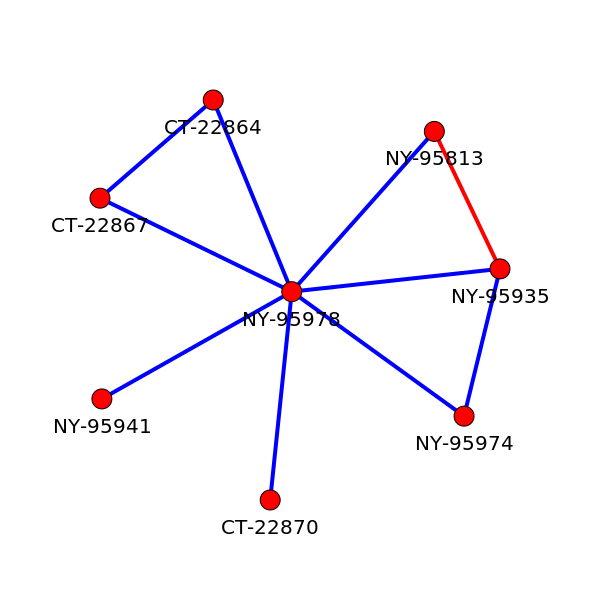

In [186]:
from IPython.display import Image
outfile = 'tmp_output.png'

g = ig.Graph.Erdos_Renyi(6,m=10)

def plot_graph(g):

    dict_c = {1:'blue', -1:'red'}
    get_color = lambda x: 'blue' if x==1 else 'red'

    # g.es['w'] = 1
    # g.es[0]['w'] = -1
    # g.es[5]['w'] = -1

    g.es['c'] = [get_color(x) for x in g.es['weight']]

    ig.plot(g, outfile, edge_color=g.es['c'], edge_width=4, vertex_label=g.vs['name'],
            vertex_label_dist=2, vertex_label_size=20, margin=100)
    
identity = reachables[0]
# identity = 'NY-466378'

g = idm.get_reachable_identities_graph(identity)
print g.es['weight']
plot_graph(g)
list_components = Database.partition_graph_of_reachable_identities(g)
for component in list_components:
    print component

Image(filename=outfile, width=500)

In [162]:
# idm.deduce_linked_identities()
for i,si in enumerate(idm.set_super_identities):
#     if i> 10: break
    if 'NY-95974' in si:
        print si
    

(u'CT-22864', u'CT-22867', u'CT-22870', u'NY-95941', u'NY-95974', u'NY-95978')


In [9]:
for state in ['districtofcolumbia','virginia','maryland']:
# for state in ['virginia']:
    print state
    exporter = Database.FecExporter(state)
    exporter.retrieve()
    exporter.set_idm(idm)
    exporter.export_csv()

districtofcolumbia
select NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id from districtofcolumbia_combined;
virginia
select NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id from virginia_combined;
maryland
select NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id from maryland_combined;


In [5]:
exporter.export_csv('delaware.csv')


Table 'identities' exists.
Table 'identities_adjacency' exists.
select id,identity from identities;


#Jierui 

In [10]:
coders = ['guest1','guest2','guest3','guest4','guest5','guest6','guest7','guest8','guest9']
data = {coder:{} for coder in coders}
for coder in coders:
    files = '/nfs/home/navid/data/Jierui/board-data-sp500_2003/{}*.json'.format(coder)
    list_files = glob(files)
#     print list_files
#     continue
    for filename in list_files:
#         print filename
        file_id = re.findall(r'-([0-9]+)\.',filename)[0]
        f = open(filename)
        tmp = json.load(f) 
        data[coder][file_id] = tmp


In [11]:
data

{'guest1': {},
 'guest2': {},
 'guest3': {},
 'guest4': {},
 'guest5': {},
 'guest6': {},
 'guest7': {},
 'guest8': {},
 'guest9': {}}

In [14]:
counter = 0
# list_rids = []
set_rids = set()
for coder in coders:
    with open('SP500_400left_{}_results.csv'.format(coder),'w') as f:
        for pageid, pagedata in sorted(data[coder].items(), key = lambda x:int(x[0])):
            list_yesses = [key for key,value in pagedata['data'].iteritems() if value[2] == 1]
            set_rids.update( {int(x) for x in list_yesses})
            f.write(pageid + " " + ' '.join(list_yesses) + "\n")

            counter += 1
    #         if counter > 20: break
    # print list_rids

## Export all the "yes" records

In [16]:
exporter = Database.FecRetrieverByID('usa_combined_v1')
exporter.retrieve(list(set_rids))
exporter.set_idm(idm)
exporter.export_csv('./all_records_sp500_400left')

inserting...
done.
Done in 8.299324 seconds
SELECT NAME,ZIP_CODE,CONTRIBUTOR_STREET_1,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_ID,ENTITY_TP,id FROM usa_combined_v1 JOIN tmp_QX9QCB0k00NjCchOht1i USING (id) ;
Done in 31.283689 seconds
dict_id_2_identity not loaded. Loading now...
select id,identity from identities_v2;


/nfs/home/navid/src/FEC-1/src/disambiguation/core/Database.py:52: Warning: Unknown table 'tmp_QX9QCB0k00NjCchOht1i'
  cur.execute(query)


# Carolina

In [49]:
coders = ['carolina','matt']
experiment = 'v5-3'
data = {coder:{} for coder in coders}
for coder in coders:
    files = '/nfs/home/navid/data/FEC-validation/results/{}/{}*.json'.format(experiment, coder)
    list_files = glob(files)
#     print list_files
    for filename in list_files:
#         print filename
        file_id = re.findall(r'-([0-9]+)\.',filename)[0]
        f = open(filename)
        tmp = json.load(f) 
        data[coder][file_id] = tmp


In [91]:
# dict_rids: dict{pageid:set_rids} all rids that need to be retrieved.
# dict_results: dict{pageid: {rid:{'navid': flag,'carolina': flag, 'matt': flag}}}


counter = 0
# list_rids = []
set_rids = set()
dict_rids = {}
dict_results = {}
coders = ['carolina','matt']
for coder in coders:
    with open('{}_{}_results_updated.csv'.format(experiment, coder),'w') as f:
        for pageid, pagedata in sorted(data[coder].items(), key = lambda x:int(x[0])):
            
            # record all rids that exist in the page.
            try:
                dict_rids[pageid].update(set([int(key) for key,value in pagedata['data']['final'].iteritems()]))
            except: 
                dict_rids[pageid] = set([int(key) for key,value in pagedata['data']['final'].iteritems()])
                
            if pageid not in dict_results: dict_results[pageid] = {rid:{'navid':0,'carolina':0, 'matt':0} for rid in pagedata['data']['final']}
            
            # set the flag for navid's result
            for rid, result_navid in pagedata['data']['initial'].iteritems():
                dict_results[pageid][rid]['navid'] = 1 if result_navid[1] == 1 else 0

            # set the flag for coder's result
            for rid, result_coder in pagedata['data']['final'].iteritems():
                dict_results[pageid][rid][coder] = 1 if result_coder[1] == 1 else 0

            
#             dict_list_coder_yesses[coder] = [key for key,value in pagedata['data']['final'].iteritems() if value[1] == 1]
#             list_navid_yesses = 
#             dict_list_navid_yesses[pageid] = [key for key,value in pagedata['data']['initial'].iteritems() if value[1] == 1]
#             set_rids.update( {int(x) for x in list_yesses})
#             dict_rids[int(pageid)] = [int(x) for x in list_yesses]
#             f.write(pageid + " " + ' '.join(list_yesses) + "\n")

            counter += 1
    #         if counter > 20: break
    # print list_rids

In [97]:
dict_rids['1']

{7780305,
 7780309,
 7780312,
 7780315,
 8561805,
 8561816,
 8666777,
 8700787,
 8910440,
 9224543,
 9295637,
 9295639,
 9329315,
 9505523,
 9610560,
 9854341,
 9959338,
 10168859,
 10239648,
 10344353,
 10344354,
 10448676,
 10694010,
 10765337,
 10852513,
 11124104,
 11124109,
 11124111,
 11124113,
 11124119,
 11124122,
 11124127,
 11124135,
 11124142,
 11124145,
 11124149,
 11190956,
 11813286,
 11813292,
 11813294,
 11813296,
 11813303,
 11904868,
 12011076,
 12141895,
 12273223,
 12404896,
 12470735,
 12585417,
 12719542,
 12733888,
 12908012,
 13366423,
 13978263,
 14065760,
 14448712,
 14463754,
 14863517,
 14970305,
 15065981,
 15074900,
 15185179,
 15496162,
 15864064,
 16122396,
 16289107,
 16289109,
 16398199,
 16490177,
 16599069,
 17121931,
 17179958,
 17188322,
 17188371,
 17399313,
 17548813,
 17721752,
 17786590,
 17809540,
 17926956,
 18118138,
 18289972,
 18354294,
 18431658,
 18431665,
 18442564,
 18442571}

## Export all "yes" records

In [133]:
dict_df_navid_tmp = {pageno: pd.DataFrame([(int(rid), dict_decision['navid']) \
                                for rid,dict_decision in dict_results[pageno].iteritems()],
                                     columns=['id','decision'])\
                     for pageno in dict_rids}

dict_df_carolina_tmp = {pageno: pd.DataFrame([(int(rid), dict_decision['carolina']) \
                                for rid,dict_decision in dict_results[pageno].iteritems()],
                                     columns=['id','decision'])\
                     for pageno in dict_rids}

dict_df_matt_tmp = {pageno: pd.DataFrame([(int(rid), dict_decision['matt']) \
                                for rid,dict_decision in dict_results[pageno].iteritems()],
                                     columns=['id','decision'])\
                     for pageno in dict_rids}
dict_df_navid ={pageno : df.set_index('id') for pageno, df in dict_df_navid_tmp.iteritems()}
dict_df_carolina ={pageno : df.set_index('id') for pageno, df in dict_df_carolina_tmp.iteritems()}
dict_df_matt ={pageno : df.set_index('id') for pageno, df in dict_df_matt_tmp.iteritems()}


In [138]:
exporter = Database.FecRetrieverByID('usa_combined_v2')
exporter.set_idm(idm)

# All records that the coder selected as yes,
for pageid, set_rids in dict_rids.items():
    print pageid, len(set_rids), len(dict_df_navid[pageid])
#     continue

    exporter.retrieve(list(set_rids))
    # DataFrame with all the records present in
    # a handcoding page. Will be augmented with 
    # coder result flags as new columns.
    df = exporter.export_csv(filename = None)
    df = df.set_index('id')
    filename = '/nfs/home/navid/data/FEC-validation/{experiment}-allcoders-{pageno}.csv'.format(experiment = experiment,pageno = pageid)
    df['navid'] = dict_df_navid[pageid]
    df['carolina'] = dict_df_carolina[pageid]
    df['matt'] = dict_df_matt[pageid]
    df.sort(['navid','carolina','matt'],inplace = True, ascending = False)
    df.to_csv(filename, sep = '|', index=True)


24 33 33
25 4 4
26 39 39
27 115 115
20 56 56
21 244 244
22 8 8
23 26 26
28 8 8
29 128 128
4 34 34
8 73 73
59 24 24
58 44 44
55 4 4
54 39 39
57 2 2
56 2 2
51 1 1
50 42 42
53 13 13
52 304 304
88 110 110
89 120 120
82 73 73
83 1003 1003
inserting...
done.
80 12 12
81 64 64
86 1 1
87 1 1
84 35 35
85 198 198
3 32 32
7 81 81
39 6 6
38 28 28
33 29 29
32 48 48
31 4 4
30 4 4
37 11 11
36 69 69
35 27 27
34 3 3
60 13 13
61 18 18
62 60 60
63 60 60
64 7 7
65 32 32
66 4 4
67 195 195
68 11 11
69 18 18
2 34 34
6 275 275
91 23 23
90 25 25
93 205 205
92 21 21
95 107 107
94 6 6
11 1 1
10 27 27
13 15 15
12 789 789
15 27 27
14 418 418
17 38 38
16 14 14
19 819 819
18 409 409
48 190 190
49 53 53
46 14 14
47 26 26
44 17 17
45 2 2
42 3 3
43 629 629
40 22 22
41 782 782
1 87 87
5 10 10
9 28 28
77 5 5
76 5 5
75 63 63
74 33 33
73 88 88
72 546 546
71 18 18
70 61 61
79 9 9
78 81 81


/nfs/home/navid/src/FEC-1/src/disambiguation/core/Database.py:62: Warning: Unknown table 'tmp_ii5b7wP0KbMe1LuND8Re'
  cur.execute(query)


# Export version for Bonica 

In [139]:
exporter = Database.FecRetrieverByID('usa_combined_v2')
exporter.set_idm(idm)

# All records that the coder selected as yes,
for pageid, set_rids in dict_rids.items():
    print pageid, len(set_rids), len(dict_df_navid[pageid])
#     continue

    exporter.retrieve(list(set_rids))
    # DataFrame with all the records present in
    # a handcoding page. Will be augmented with 
    # coder result flags as new columns.
    df = exporter.export_csv(filename = None)
    df = df.set_index('id')
    filename = '/nfs/home/navid/data/FEC-validation/new-{experiment}-handcoded-{pageno}.csv'.format(experiment = experiment,pageno = pageid)
    df['flag_selected_auto'] = dict_df_navid[pageid]
    df['flag_selected_manual'] = dict_df_carolina[pageid]
#     df['matt'] = dict_df_matt[pageid]
    df.sort(['flag_selected_auto','flag_selected_manual'],inplace = True, ascending = False)
    df.to_csv(filename, sep = '|', index=True)


24 33 33
25 4 4
26 39 39
27 115 115
20 56 56
21 244 244
22 8 8
23 26 26
28 8 8
29 128 128
4 34 34
8 73 73
59 24 24
58 44 44
55 4 4
54 39 39
57 2 2
56 2 2
51 1 1
50 42 42
53 13 13
52 304 304
88 110 110
89 120 120
82 73 73
83 1003 1003
inserting...
done.
80 12 12
81 64 64
86 1 1
87 1 1
84 35 35
85 198 198
3 32 32
7 81 81
39 6 6
38 28 28
33 29 29
32 48 48
31 4 4
30 4 4
37 11 11
36 69 69
35 27 27
34 3 3
60 13 13
61 18 18
62 60 60
63 60 60
64 7 7
65 32 32
66 4 4
67 195 195
68 11 11
69 18 18
2 34 34
6 275 275
91 23 23
90 25 25
93 205 205
92 21 21
95 107 107
94 6 6
11 1 1
10 27 27
13 15 15
12 789 789
15 27 27
14 418 418
17 38 38
16 14 14
19 819 819
18 409 409
48 190 190
49 53 53
46 14 14
47 26 26
44 17 17
45 2 2
42 3 3
43 629 629
40 22 22
41 782 782
1 87 87
5 10 10
9 28 28
77 5 5
76 5 5
75 63 63
74 33 33
73 88 88
72 546 546
71 18 18
70 61 61
79 9 9
78 81 81


/nfs/home/navid/src/FEC-1/src/disambiguation/core/Database.py:62: Warning: Unknown table 'tmp_dxqGUZZUEXpRfG4nsidK'
  cur.execute(query)


In [137]:
df.sort(['navid','carolina','matt'],inplace = True, ascending = False)


In [100]:
print len(dict_df_navid['24'])
print len(df)
print len(set_rids)


33
33
128


In [ ]:
df

#  Export a given set of records

In [5]:
data = pd.read_csv('/nfs/home/navid/data/Jierui/ids_2003_toNavid.csv')

In [6]:
data


,Date,id,identity
0,3/31/2000,1062844,NY-166683
1,2/16/1996,23009379,IA-15663
2,3/26/1996,22958034,IA-15663
3,11/3/2003,5451566,IA-15663
4,6/30/2004,3949152,MA-69773
5,10/4/2006,6324480,MA-69773
6,2/13/2007,9957170,MA-69773
7,6/30/2007,8698515,MA-69773
8,12/12/2007,7598901,MA-69773
9,3/13/2008,8559765,MA-69773


In [7]:
counter_error = 0
counter_ok = 0
list_rids = []
for x in data['id']:
    try:
        list_rids.append(int(x))
        counter_ok += 1
    except:
        counter_error += 1
print counter_ok, counter_error
print len(list_rids)

85672 0
85672


In [8]:
print len(list_rids), len(set(list_rids))

85672 85387


In [9]:
# exporter = Database.FecRetrieverByID('usa_combined_v1')
exporter = Database.FecRetrieverByID('individual_contributions_v1')
exporter.all_fields.remove('CONTRIBUTOR_STREET_1')
exporter.retrieve(list(set(list_rids)))
exporter.set_idm(idm)
exporter.export_csv('./all_records_ids_2003_toNavid_round2')

inserting...
done.
dict_id_2_identity not loaded. Loading now...
select id,identity from identities_v5;


/nfs/home/navid/src/FEC-1/src/disambiguation/core/Database.py:62: Warning: Unknown table 'tmp_O3za1ZJUnABSWtzBJsYL'
  cur.execute(query)
